# Лабораторная 5

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


## 1.1 Визуализация решающих деревьев

Рассмотрим визуализацию решающих деревьев в библиотеке skleran. 

In [2]:
# датасет Ирисы Фишера, содержащий 150 объектов 3 классов
# каждый объект имеет 4 признака
iris = load_iris()

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

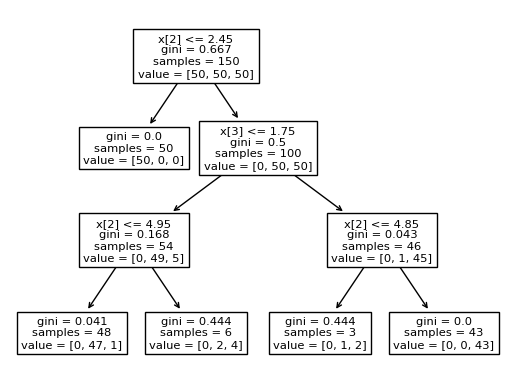

In [3]:
# создаём дерево глубины 3
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)
# обучаем дерево
clf = clf.fit(iris.data, iris.target)
# с помощь. plot_tree осуществляем визуальное построение дерева
tree.plot_tree(clf)

В каждом узле визиуализированного дерева мы можем видеть:

* предикат, к примеру $X[2] <= 2.45$
* значение коэффициента джини, к примеру  $gini = 0.667$
* число экземпляров в каждом узле, к примеру $samples = 150$
* распределение экземпляров по классам, к примеру $value = [50, 50, 50]$

Обратите внимание, что дерево строится таким образом, чтобы в каждом следующем узле значение ***коэффициента джини было меньше и меньше***. 

## 1.2 Значимость признаков

В данном разделе под важностью признаков мы будем понимать их способность снижать неопределённость (уменьшать энтропию или коэффициент джини). 

In [4]:
# создаём дерево глубины 3
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)
# обучаем дерево
clf = clf.fit(iris.data, iris.target)
# получим важность признаков с помощью feature_importances_
importances = clf.feature_importances_
print(importances)

[0.         0.         0.58561555 0.41438445]


О чём говорят полученные результаты?

В данной моделе (дерево глубины 3) признак $X[0]$ и $X[1]$ имеет важность 0. В данной моделе это действительно так, обратите внимание в дереве выше признак $X[0]$ и $X[1]$ в узлах не используется.  

Признак $X[2]$ и $X[3]$ имеют примерно одинаковую значимость и $X[2]$ несколько больше. В этом мы можем убедиться, посмотрев дерево выше. 

### Задача 1 (2 балла)

1. Постройте дерево глубины 4 и визуализируйте его.
2. Какой признак чаще всего встречается в предикатах(узлах) построенного вами дерева?
3. Постройте дерево глубины 7 и отсортируйте признаки по значимости у данного дерева?

***Для деревьев используйте random_state = 42***

[Text(0.5125, 0.9, 'x[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.275, 0.7, 'x[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.15, 0.5, 'x[13] <= 91.555\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.1, 0.3, 'x[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.05, 0.1, 'gini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.15, 0.1, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'x[21] <= 25.67\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.3, 0.3, 'x[23] <= 810.3\ngini = 0.332\nsamples = 19\nvalue = [4, 15]'),
 Text(0.25, 0.1, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.35, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.3, 'x[6] <= 0.097\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.45, 0.1, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.55, 0.1, 'gini = 0.0\nsamples = 2

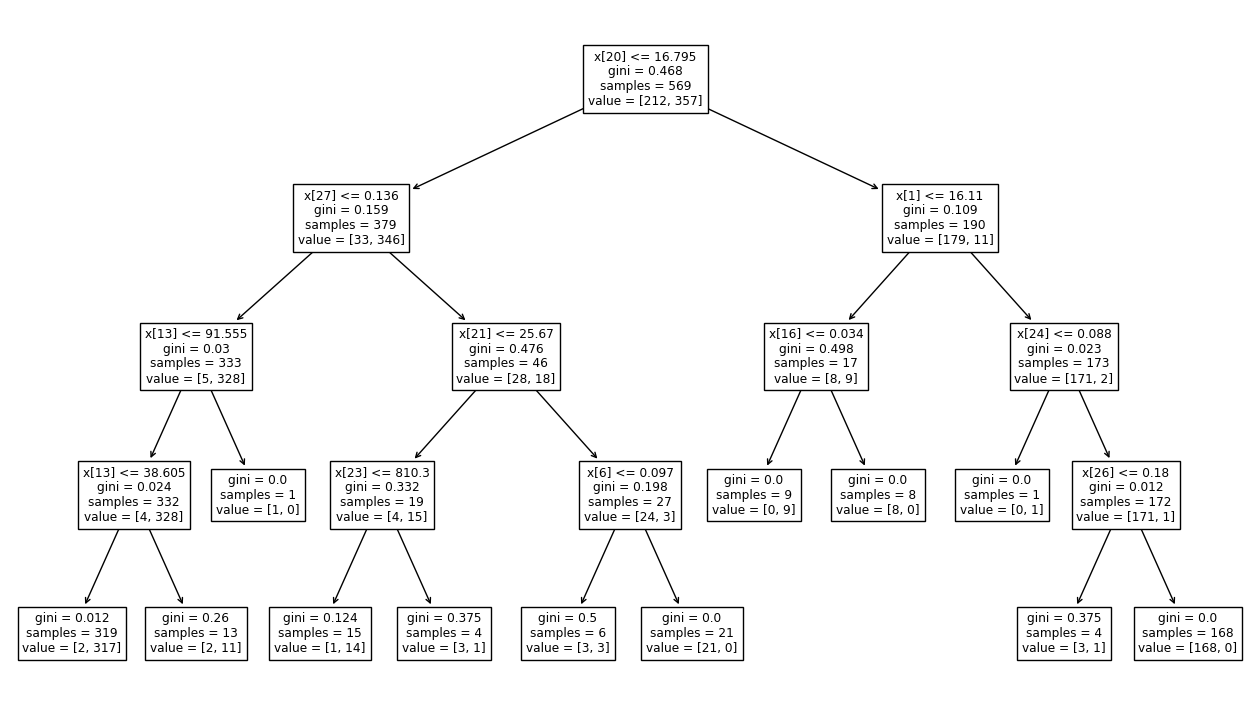

In [5]:
from matplotlib import pyplot as plt
# Используйте данный датасет
data = load_breast_cancer()
X = data.data
y = data.target

clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42)

clf = clf.fit(X, y)
plt.figure(figsize = (16, 9))
tree.plot_tree(clf)

In [6]:
# Используйте данный датасет
data = load_breast_cancer()
X = data.data
y = data.target

clf = tree.DecisionTreeClassifier(max_depth = 7, random_state = 42)

clf = clf.fit(X, y)
importances = clf.feature_importances_
importances

array([0.        , 0.01127715, 0.        , 0.        , 0.00563858,
       0.01253017, 0.        , 0.00877112, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00936121, 0.00100384,
       0.        , 0.03184137, 0.        , 0.        , 0.        ,
       0.69559352, 0.08372822, 0.        , 0.0110859 , 0.01440488,
       0.        , 0.00766716, 0.10709688, 0.        , 0.        ])

## 2. Ещё немного о случайном лесе

На прошлой лабораторной мы узнали, что 

***Случайный лес*** - это ансамблевая модель машинного обучения, которая состоит из множества решающих деревьев. Основная идея случайного леса заключается в том, что каждое дерево строится независимо друг от друга, используя случайные подвыборки данных и случайные подмножества признаков.

Основные этапы построения:

***1. Бутстрэп выборка***: Для построения каждого дерева случайного леса используется бутстрэп выборка, то есть случайная выборка из исходного набора данных. Это позволяет создавать различные подвыборки для каждого дерева.

***2. Случайный выбор признаков***: При разбиении узлов в каждом дереве случайного леса, выбирается случайное подмножество признаков. Это позволяет деревьям быть разнообразными и уменьшает корреляцию между ними.

***3. Итоговое предсказание***: При получении новых данных, случайный лес объединяет предсказание каждого дерева и использует их для получения окончательного предсказания. Обычно это осуществляется путем усреднения предсказаний для задачи регрессии или голосования большинства для задачи классификации.

Давайте рассмотрим подробнее каждый пункт. Пусть дана обучающая выборка $X_{train}$, $y_{train}$, в которой присутствует $n$ объектов. 

Пусть мы хотим построить модель случайного леса со 100 деревьями. 

***Шаг1*** 

Из выборки $X_{train}$ выбирается выбирается случайно n элементов, при этом ***элементы могут повторяться***. Проделываем так 100 раз. Таким образом мы получаем 100 подвыборок $X_1 ... X_{100}$, каждая из которых содержит по $n$ объектов выборки $X_{train}$, но ***не*** обязательно уникальных.   

***Шаг2***

Строим 100 решающих деревьев: $a_1, ... a_{100}$. При этом разбиении ***каждого узла*** в каждом дереве случайного леса, выбирается случайное подмножество признаков. 

***Шаг3***

Пусть есть объект $x$ из $X_{test}$. 

В случае регрессии получаем предсказание: $\frac{a_1(x) + ... a_{100}(x)}{100}$

В случае классификации самый популярный класс среди прогнозов $a_1(x) ... a_{100}(x)$

### Задача2 (2 балла)

1. Постройте график зависимости точности от количество признаков, рассматриваемых при разделении (***max_features***). 
2. Точность расчитывайте с помощью кросс-валидации с cv = 10.

In [7]:
# загрузим датасет
mnist = fetch_openml('mnist_784')
# ВАША КОД ЗДЕСЬ

c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
accuracies = []
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y = mnist.data, mnist.target
for i in range (1, 10):
    clf = RandomForestClassifier(n_estimators=3, random_state=42, max_features = i)
    accuracies.append(np.mean(cross_val_score(clf, X, y, cv = 10)))
    print(accuracies[-1])
accuracies

0.7857
0.8011285714285716
0.8082285714285714
0.8159000000000001
0.8276857142857142
0.8332571428571429
0.8389857142857142
0.8439285714285715
0.8456571428571429


[0.7857,
 0.8011285714285716,
 0.8082285714285714,
 0.8159000000000001,
 0.8276857142857142,
 0.8332571428571429,
 0.8389857142857142,
 0.8439285714285715,
 0.8456571428571429]

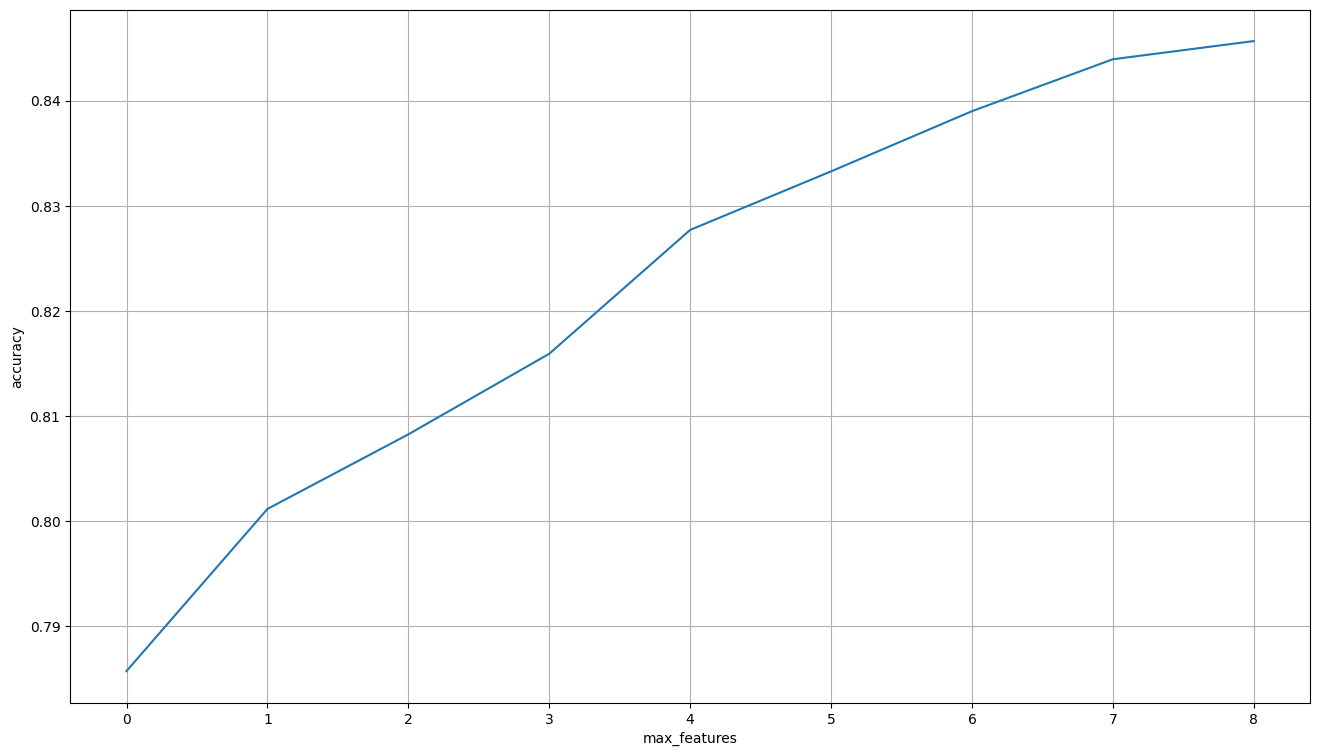

In [11]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(accuracies)
plt.grid()
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()

### Задача3 (1 балл)

На первом шаге построения случайного леса создаётся несколько подвыборок размера n. К какому значению стремится доля уникальных объектов в данной подвыборке при n стремящихся к бесконечности?

## 3.1 Градиентный бустинг

***Градиентный бустинг*** - это метод машинного обучения, который используется для построения ансамблей деревьев решений. Он основан на идее обучения слабых моделей последовательно, при этом каждая новая модель исправляет ошибки предыдущей.

Процесс градиентного бустинга начинается с построения первой модели (например, дерева решений) на обучающем наборе данных. Затем, для улучшения предсказаний, строится следующая модель, которая фокусируется на уменьшении ошибок предыдущей модели. Это достигается путем оптимизации функции потерь, например, путем градиентного спуска. Таким образом, каждая следующая модель дополняет предыдущую, и в результате получается сильная модель, способная делать точные предсказания.

Основные преимущества градиентного бустинга включают высокую точность предсказаний и способность работать с различными типами данных. Однако, такой подход может потребовать больше времени на обучение и настройку параметров моделей.

Градиентный бустинг широко используется в задачах регрессии и классификации, и является одним из наиболее популярных методов машинного обучения из-за своей эффективности и мощности.

Пусть, у нас есть обучающая выборка с парами $(X_{train}, y_{train})$, где $X$ представляет собой входные признаки. Наша цель - построить ансамбль моделей $F(X)$, который минимизирует некоторую функцию потерь $L(y, F(X))$.

1. ***Инициализация***: Начнем с построения базовой модели $F_0(X)$, которая инициализируется нулевым предсказанием: $F_0(X) = 0$

***Для каждой итерации*** i от 1 до M

2. Вычисляем : $r_i = y - F_{i-1}(X)$. Таким образом мы получаем множество ответов для i-модели.

3. Обучаем новую модель $h_i(X;\theta_i)$ на выборке $(X_{train}, r_i)$. Модель $h_i(X;\theta_i)$ может быть любой базовой моделью, например, деревом решений.

4. Находим оптимальные параметры $\theta_i$, минимизируя функцию потерь, например, среднеквадратическую ошибку (MSE): $\theta_i$ = $argmin(L(y, F_{i-1}(X) + h_i(X;\theta_i)))$. 

5. Обновляем ансамбль моделей: $F_i(X) = F_{i-1}(X) + \alpha h_i(X;\theta_i)$ , где $\alpha$ - скорость обучения, обычно выбирается маленьким, чтобы избежать переобучения.

6. Получаем окончательный ансамбль моделей: $F(X) = F_M(X)$

## 3.2 Реализации градиентного бустинга

Существует несколько популярных библиотек и фреймворков, которые предоставляют реализации градиентного бустинга. Вот несколько из них:

__XGBoost (eXtreme Gradient Boosting)__: XGBoost - это высокопроизводительная реализация градиентного бустинга, разработанная для достижения высокой скорости и масштабируемости. Она предоставляет оптимизированную по производительности модель градиентного бустинга, которая может быть использована для задач классификации, регрессии и ранжирования.

__LightGBM__: LightGBM - это ещё одна высокопроизводительная библиотека градиентного бустинга, разработанная компанией Microsoft. Она была оптимизирована для больших объёмов данных и имеет встроенную поддержку распределённых вычислений. LightGBM также предоставляет высокую скорость обучения и позволяет обрабатывать категориальные признаки напрямую без предварительного преобразования.

__CatBoost__: CatBoost - это библиотека градиентного бустинга, разработанная компанией Яндекс. Она специализируется на обработке категориальных признаков и включает в себя механизм автоматического кодирования категориальных признаков, уменьшая необходимость вручную выполнять этот шаг.

__Scikit-learn__: Библиотека scikit-learn также предоставляет реализацию градиентного бустинга в своём модуле ensemble под названием GradientBoostingClassifier (для классификации) и GradientBoostingRegressor (для регрессии). Однако, её производительность может быть не настолько высокой, как у специализированных библиотек.

## 3.3 CatBoostClassifier

Наиболее популярными гиперпараметрами являются: 

__learning_rate__: Скорость обучения (learning rate). Этот параметр контролирует величину изменения весов на каждом шаге градиентного спуска, и влияет на скорость сходимости модели.

__depth__: Максимальная глубина деревьев. Определяет максимальную глубину деревьев, которые используются в градиентном бустинге.

__l2_leaf_reg__: L2 регуляризация. Этот параметр контролирует силу регуляризации, помогая предотвратить переобучение модели.

__iterations__: Количество итераций (деревьев), которые будут созданы в градиентном бустинге.

__border_count__: Параметр, определяющий, сколько значений должно быть у категориального признака, чтобы считать его категориальным. Это позволяет модели эффективно обрабатывать категориальные признаки.

__random_seed__: Случайное зерно, используемое для воспроизводимости результатов.

In [14]:
from catboost import CatBoostClassifier
# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# создание модели с параметрами по умолчанию
model = CatBoostClassifier()
# обучение и расчёт точности с помощью кросс-валидации
model.fit(X, y)
scores = cross_val_score(model, X, y, cv = 10)

Learning rate set to 0.008098
0:	learn: 0.6787961	total: 9.98ms	remaining: 9.97s
1:	learn: 0.6664918	total: 19.3ms	remaining: 9.61s
2:	learn: 0.6539820	total: 27ms	remaining: 8.97s
3:	learn: 0.6420001	total: 36.3ms	remaining: 9.04s
4:	learn: 0.6298795	total: 45.3ms	remaining: 9.02s
5:	learn: 0.6180740	total: 55ms	remaining: 9.11s
6:	learn: 0.6052833	total: 64.9ms	remaining: 9.21s
7:	learn: 0.5935346	total: 73.2ms	remaining: 9.08s
8:	learn: 0.5814179	total: 82.7ms	remaining: 9.11s
9:	learn: 0.5712730	total: 91.3ms	remaining: 9.04s
10:	learn: 0.5618210	total: 100ms	remaining: 9.03s
11:	learn: 0.5511707	total: 109ms	remaining: 8.94s
12:	learn: 0.5418271	total: 118ms	remaining: 8.98s
13:	learn: 0.5322701	total: 126ms	remaining: 8.91s
14:	learn: 0.5231045	total: 135ms	remaining: 8.89s
15:	learn: 0.5138858	total: 143ms	remaining: 8.77s
16:	learn: 0.5052878	total: 151ms	remaining: 8.74s
17:	learn: 0.4964165	total: 158ms	remaining: 8.63s
18:	learn: 0.4888600	total: 167ms	remaining: 8.61s
19:	l

In [13]:
# расчёт средней точности
print(f'Accuracy: {scores.mean()}')

Accuracy: 0.9701754385964912


### Задача 4(2 балла)

Ознакомьтесь с градиентным бустингом в scikit-learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Постройте модель классификации для предыдущего датасета и расчитайте точность с помощью кросс-валидации. 

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
data = load_breast_cancer()
X = data.data
y = data.target

model = GradientBoostingClassifier()
model.fit(X, y)
scores = cross_val_score(model, X, y, cv = 10)

In [17]:
print(f'Accuracy: {scores.mean()}')

Accuracy: 0.9649122807017545


### Задача 5(3 балла)

Так как наши датасеты уже начинают заканчиваться, то сгенерируем датасет сами. 

In [36]:
# данный датасет содержит 10000 объектов и всего 2 класса
# каждый объект имеет 20 признаков
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=6)

In [39]:
len(y)

10000

1. Постройте ***k-nn***, обучите его и расчитайте точность с помощью кросс-валидации с cv = 5
2. Постройте ***SVC***, обучите его и расчитайте точность с помощью кросс-валидации с cv = 5
3. Постройте ***Решающее дерево***, обучите его и расчитайте точность с помощью кросс-валидации с cv = 5
4. Постройте ***случайный Лес***, обучите его и расчитайте точность с помощью кросс-валидации с cv = 5
5. Постройте ***CatBoostClassifier***, обучите его и расчитайте точность с помощью кросс-валидации с cv = 5
6. Постройте график зависимости точности CatBoostClassifier от числа итераций(деревьев). Используейте 10, 50, 100, ... до 1000. 
7. Постройте график зависимости точности CatBoostClassifier от числа глубины дерева. Используейте все возможные значения глубины. 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

print(np.mean(cross_val_score(knn, X, y, cv = 5)))



0.9732000000000001


In [26]:
from sklearn import svm

svmm = svm.SVC()

print(np.mean(cross_val_score(svmm, X, y, cv = 5)))

0.9795000000000001


In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 15)

print(np.mean(cross_val_score(clf, X, y, cv = 5)))

0.8705


In [32]:
clf = RandomForestClassifier(n_estimators = 10)

print(np.mean(cross_val_score(clf, X, y, cv = 5)))

0.9395


In [33]:
clf = CatBoostClassifier()

print(np.mean(cross_val_score(clf, X, y, cv = 5)))


Learning rate set to 0.025035
0:	learn: 0.6775243	total: 11ms	remaining: 10.9s
1:	learn: 0.6631935	total: 22.5ms	remaining: 11.2s
2:	learn: 0.6499768	total: 34.6ms	remaining: 11.5s
3:	learn: 0.6381630	total: 44.3ms	remaining: 11s
4:	learn: 0.6265033	total: 54.7ms	remaining: 10.9s
5:	learn: 0.6153906	total: 63.5ms	remaining: 10.5s
6:	learn: 0.6057974	total: 72ms	remaining: 10.2s
7:	learn: 0.5949341	total: 82ms	remaining: 10.2s
8:	learn: 0.5841661	total: 90.4ms	remaining: 9.95s
9:	learn: 0.5750937	total: 99.8ms	remaining: 9.88s
10:	learn: 0.5647278	total: 108ms	remaining: 9.72s
11:	learn: 0.5554520	total: 116ms	remaining: 9.55s
12:	learn: 0.5464254	total: 125ms	remaining: 9.46s
13:	learn: 0.5386661	total: 134ms	remaining: 9.42s
14:	learn: 0.5314946	total: 142ms	remaining: 9.35s
15:	learn: 0.5250735	total: 150ms	remaining: 9.24s
16:	learn: 0.5178680	total: 158ms	remaining: 9.15s
17:	learn: 0.5101774	total: 166ms	remaining: 9.07s
18:	learn: 0.5034477	total: 174ms	remaining: 9.01s
19:	learn

In [40]:
from sklearn.metrics import accuracy_score
accuracy = []
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
for i in range (1, 1001, 50):
    
    clf = CatBoostClassifier(iterations = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(accuracy[-1])


Learning rate set to 0.5
0:	learn: 0.5057189	total: 13.6ms	remaining: 0us
0.7726666666666666
Learning rate set to 0.3622
0:	learn: 0.5383013	total: 25.1ms	remaining: 1.25s
1:	learn: 0.4546132	total: 38.1ms	remaining: 934ms
2:	learn: 0.3877596	total: 48.3ms	remaining: 773ms
3:	learn: 0.3501718	total: 57.1ms	remaining: 671ms
4:	learn: 0.3193533	total: 64.9ms	remaining: 597ms
5:	learn: 0.2979527	total: 72.9ms	remaining: 546ms
6:	learn: 0.2735577	total: 80.9ms	remaining: 509ms
7:	learn: 0.2520908	total: 89ms	remaining: 479ms
8:	learn: 0.2331385	total: 96.5ms	remaining: 451ms
9:	learn: 0.2188974	total: 104ms	remaining: 428ms
10:	learn: 0.2051647	total: 112ms	remaining: 407ms
11:	learn: 0.1970223	total: 120ms	remaining: 390ms
12:	learn: 0.1893960	total: 128ms	remaining: 373ms
13:	learn: 0.1790067	total: 136ms	remaining: 358ms
14:	learn: 0.1710349	total: 144ms	remaining: 346ms
15:	learn: 0.1666831	total: 153ms	remaining: 335ms
16:	learn: 0.1546838	total: 161ms	remaining: 321ms
17:	learn: 0.14

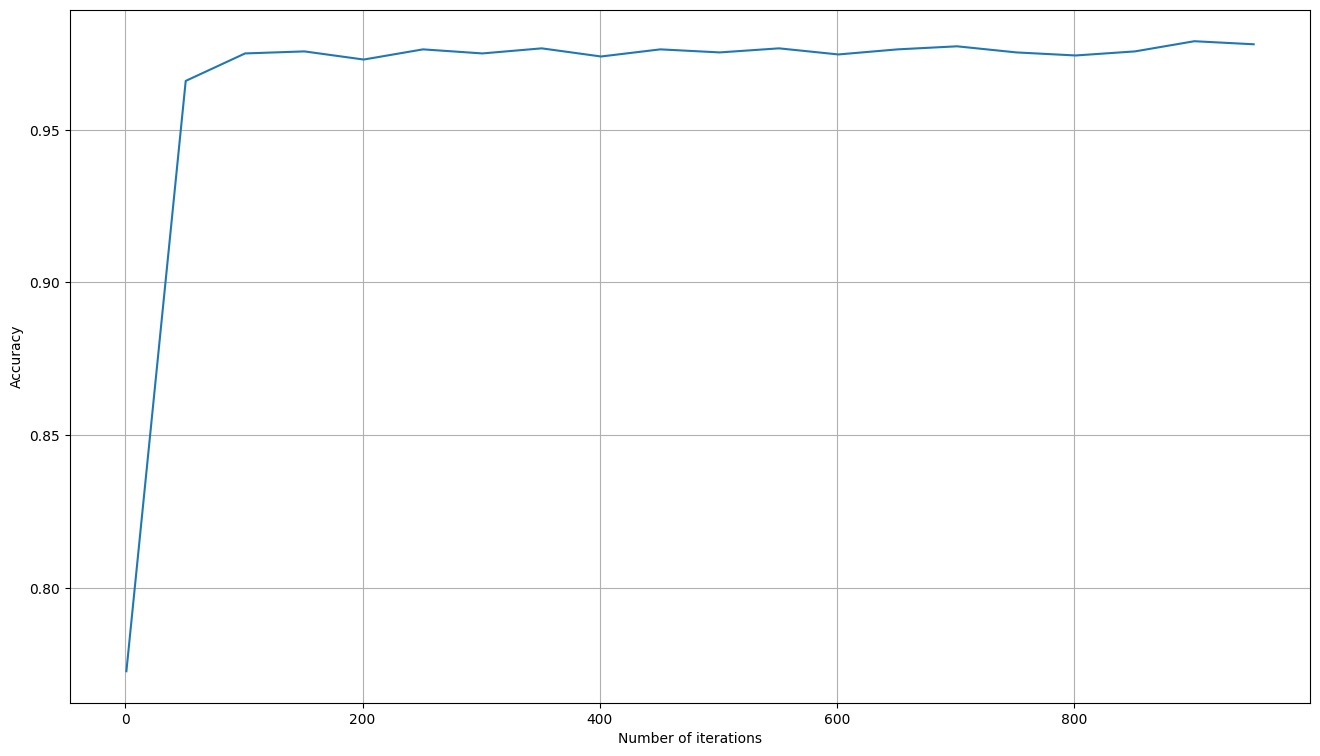

In [45]:
fig, ax = plt.subplots(figsize = (16,9))
a = [i for i in range (1, 1001, 50)]
plt.plot(a, accuracy)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
accuracy = []
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
for i in range (1, 20):
    clf = CatBoostClassifier(max_depth = i, iterations = 50)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

Learning rate set to 0.023648
0:	learn: 0.6904029	total: 3.19ms	remaining: 3.19s
1:	learn: 0.6878863	total: 6.84ms	remaining: 3.41s
2:	learn: 0.6853779	total: 14.2ms	remaining: 4.73s
3:	learn: 0.6830193	total: 18ms	remaining: 4.48s
4:	learn: 0.6806755	total: 21.7ms	remaining: 4.31s
5:	learn: 0.6784886	total: 25.9ms	remaining: 4.28s
6:	learn: 0.6763941	total: 29.7ms	remaining: 4.22s
7:	learn: 0.6743733	total: 33.3ms	remaining: 4.13s
8:	learn: 0.6725763	total: 38ms	remaining: 4.19s
9:	learn: 0.6708833	total: 45.6ms	remaining: 4.52s
10:	learn: 0.6688876	total: 50.8ms	remaining: 4.57s
11:	learn: 0.6669784	total: 56.3ms	remaining: 4.63s
12:	learn: 0.6652073	total: 60.5ms	remaining: 4.59s
13:	learn: 0.6634757	total: 64.6ms	remaining: 4.55s
14:	learn: 0.6621462	total: 68.6ms	remaining: 4.5s
15:	learn: 0.6606051	total: 72.4ms	remaining: 4.45s
16:	learn: 0.6590472	total: 75.8ms	remaining: 4.38s
17:	learn: 0.6575879	total: 78.9ms	remaining: 4.31s
18:	learn: 0.6563164	total: 82.3ms	remaining: 4.2

KeyboardInterrupt: 

In [48]:
len(accuracy)

13

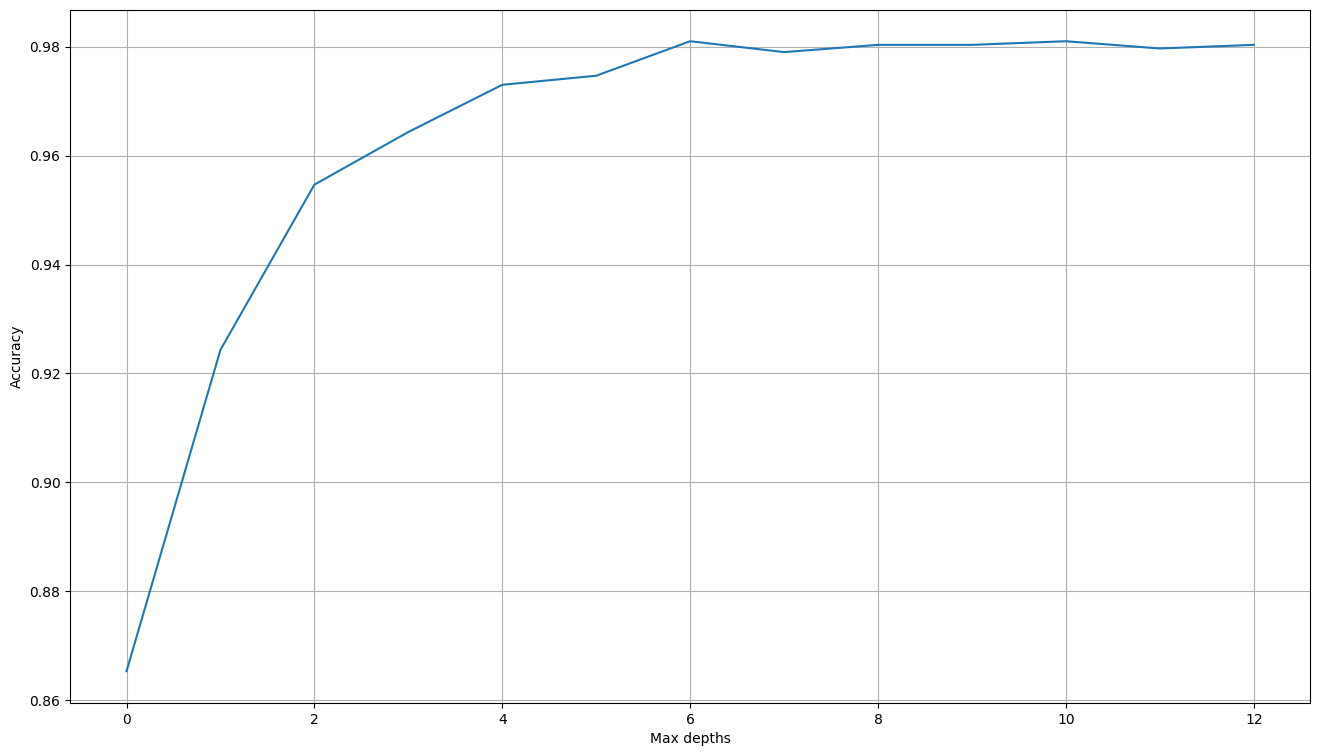

In [50]:
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(accuracy)
plt.grid()
plt.xlabel('Max depths')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
for i in range (1, 20):
    clf = CatBoostClassifier(max_depth = i, iterations = 50)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

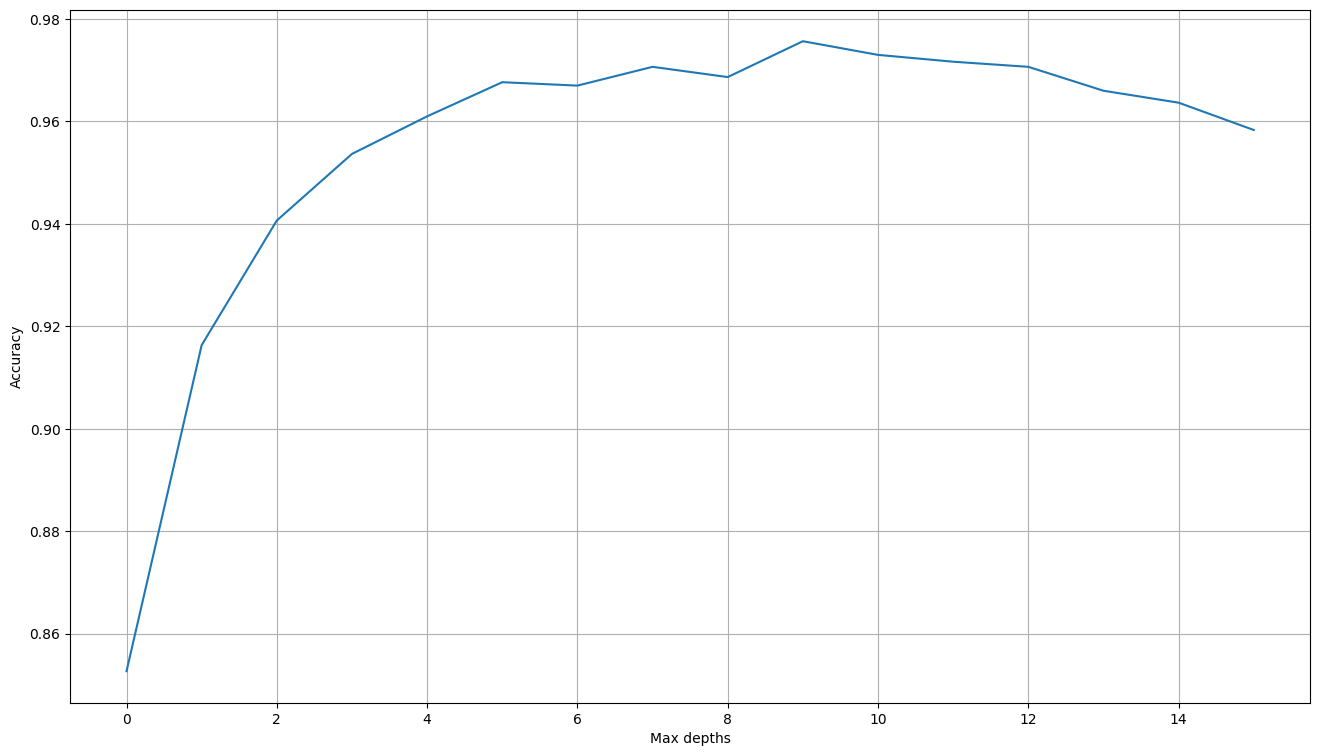

In [53]:
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(accuracy)
plt.grid()
plt.xlabel('Max depths')
plt.ylabel('Accuracy')
plt.show()

In [15]:
X, y = make_classification(n_samples=576, n_features=21, n_informative=10, n_redundant=5, random_state=6)

[Text(0.34131493506493504, 0.9545454545454546, 'x[11] <= -1.072\ngini = 0.5\nsamples = 576\nvalue = [289, 287]'),
 Text(0.1461038961038961, 0.8636363636363636, 'x[5] <= -1.046\ngini = 0.275\nsamples = 176\nvalue = [29, 147]'),
 Text(0.05844155844155844, 0.7727272727272727, 'x[6] <= 0.603\ngini = 0.48\nsamples = 45\nvalue = [18, 27]'),
 Text(0.025974025974025976, 0.6818181818181818, 'x[16] <= 4.216\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.012987012987012988, 0.5909090909090909, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.03896103896103896, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09090909090909091, 0.6818181818181818, 'x[14] <= -2.04\ngini = 0.382\nsamples = 35\nvalue = [9, 26]'),
 Text(0.06493506493506493, 0.5909090909090909, 'x[5] <= -2.316\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.05194805194805195, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.07792207792207792, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')

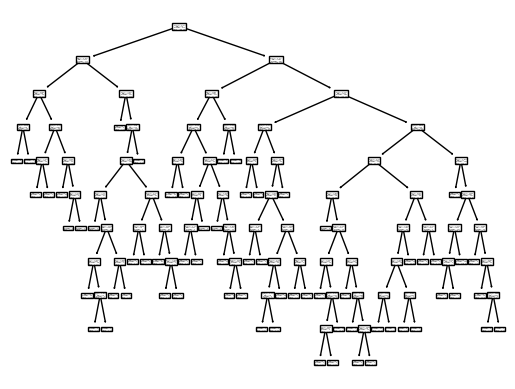

In [16]:
clf = tree.DecisionTreeClassifier(max_depth = 12, random_state = 42)

clf = clf.fit(X, y)
# с помощь. plot_tree осуществляем визуальное построение дерева
tree.plot_tree(clf)